In [1]:
#Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("CT2012.csv")

/var/folders/k1/b0_21mv5409283p9ml_l0yb40000gn/T/ipykernel_16253/768710415.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data exploration

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193274 entries, 0 to 193273
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_year              193274 non-null  int64  
 1   ori                    193274 non-null  object 
 2   pub_agency_name        193274 non-null  object 
 3   pub_agency_unit        2202 non-null    object 
 4   agency_type_name       193274 non-null  object 
 5   state_abbr             193274 non-null  object 
 6   state_name             193274 non-null  object 
 7   division_name          193274 non-null  object 
 8   county_name            193274 non-null  object 
 9   region_name            193274 non-null  object 
 10  population_group_code  193232 non-null  object 
 11  population_group_desc  193232 non-null  object 
 12  offense_code           193274 non-null  object 
 13  offense_name           193274 non-null  object 
 14  offender_race          108063 non-nu

In [3]:
df.head()

,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,county_name,region_name,...,location_name,weapon_code,weapon_name,prop_desc_code,prop_desc_code.1,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
0,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
1,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
2,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
3,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Not Specified,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25
4,2012,FL0160200,Jacksonville,NaN,City,FL,Florida,South Atlantic,DUVAL,South,...,Commercial/Office Building,12,Handgun,8.0,8.0,Consumable Goods,10000.0,10000,True,2012-07-25


## Data cleaning

We're going to drop pub_agency_unit, offender_race, and offender_ethnicity. They don't have enough rows (<50%) to make sense to include. We're also going to drop offense_code, prop_desc_code, prop_desc_code.1, weapon_code, population_group_code, location_code, victim_type_code, and state_abbr because they are repeats of data we have. 

In [4]:
#Dropping the useless columns
df = df.drop(["pub_agency_unit", "offender_race", "offender_ethnicity", "offense_code", "prop_desc_code", "prop_desc_code.1", "weapon_code", "population_group_code", "location_code", "victim_type_code", "state_abbr"], axis=1)


In [5]:
#Verify the changes we wanted took place
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193274 entries, 0 to 193273
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   data_year              193274 non-null  int64  
 1   ori                    193274 non-null  object 
 2   pub_agency_name        193274 non-null  object 
 3   agency_type_name       193274 non-null  object 
 4   state_name             193274 non-null  object 
 5   division_name          193274 non-null  object 
 6   county_name            193274 non-null  object 
 7   region_name            193274 non-null  object 
 8   population_group_desc  193232 non-null  object 
 9   offense_name           193274 non-null  object 
 10  offender_age           99481 non-null   float64
 11  offender_sex           108063 non-null  object 
 12  victim_type_name       193274 non-null  object 
 13  location_name          193274 non-null  object 
 14  weapon_name            15500 non-nul

## Exploring the data

<Axes: xlabel='stolen_value'>

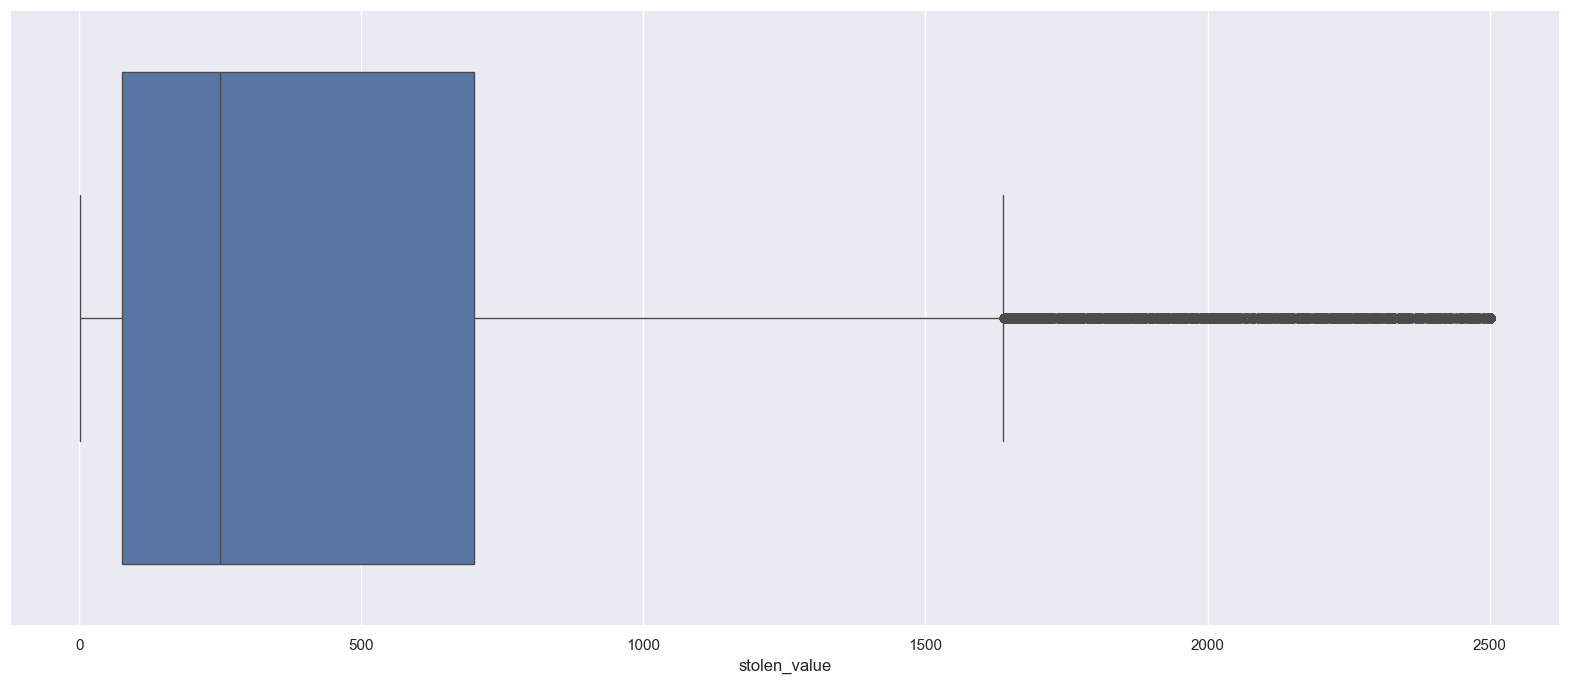

In [16]:

#From ChatGPT
#I drop the upper and lower 5% of data, as well as all values of $0 and $1 because they were both more than 10% of all values--I think this means they were catch-all values.
def drop_outliers(df, column_name, lower_percentile=5, upper_percentile=95, drop_values=[0, 1]):
    lower_bound = df[column_name].quantile(lower_percentile / 100)
    upper_bound = df[column_name].quantile(upper_percentile / 100)

    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound) & (~df[column_name].isin(drop_values))]

    return filtered_df
df = drop_outliers(df, column_name='stolen_value')


sns.boxplot(data = df, x = "stolen_value")

/var/folders/k1/b0_21mv5409283p9ml_l0yb40000gn/T/ipykernel_16253/4192417494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='offender_sex', y='offender_age', data=df, palette='pastel')


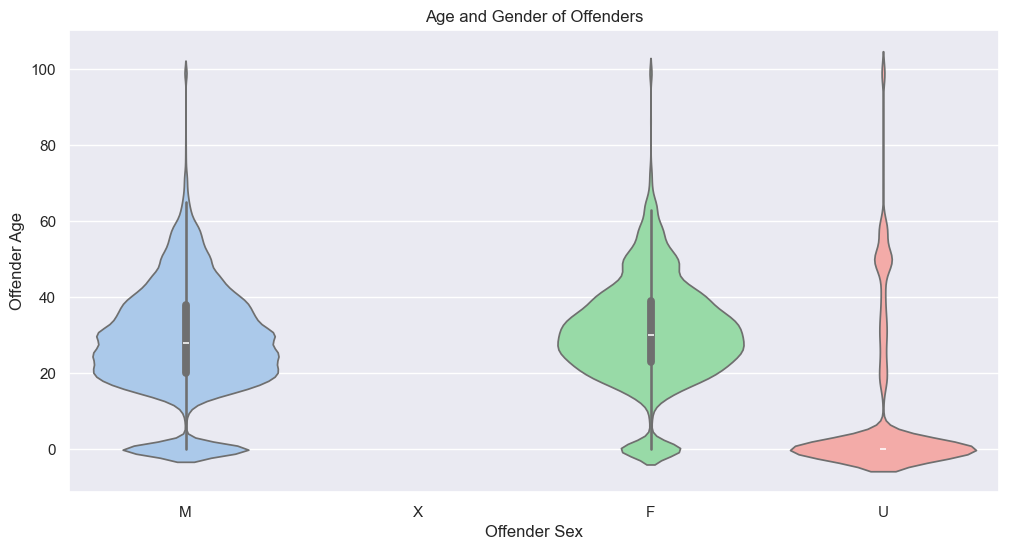

In [12]:
#Plotting offender age and sex
#23 offenders have sex "x" so we'll remove them
df = df[df['offender_sex'] != 'x']

plt.figure(figsize=(12, 6))
sns.violinplot(x='offender_sex', y='offender_age', data=df, palette='pastel')
plt.title('Age and Gender of Offenders')
plt.xlabel('Offender Sex')
plt.ylabel('Offender Age')
plt.show()

In [23]:
#What is the most stolen from state?
mode_state = df['state_name'].mode().values[0]
print(mode_state)

North Carolina


In [29]:
#And how many times was a cargo theft committed there?
mode_count = (df['state_name'] == mode_state).sum()
print(mode_count, mode_count/df.shape[0] * 100)


22959 20.875613747954176


## Statistical analysis

What agency recovered the most cargo value?

In [66]:
#Use groupby to sort by pub_agency_name and then sum the recovered value. Find the max and the total.
#One issue with this is that many agencies did not report the value recovered (or recovered nothing of value, ever)
most_recovered_agency = df.groupby('pub_agency_name')['recovered_value'].sum().idxmax()
most_recovered_amount = df.groupby('pub_agency_name')['recovered_value'].sum().max()
madera_info = df.loc[df["pub_agency_name"] == most_recovered_agency].iloc[0]

print(most_recovered_agency, "with $" + str(most_recovered_amount), "recovered in the state of", madera_info["state_name"])

Madera with $197635 recovered in the state of California


What was the most stolen from state, and how many thefts occured there?

In [41]:
#What is the most stolen from state?
mode_state = df['state_name'].mode().values[0]
print(mode_state)

#And how many times was a cargo theft committed there?
mode_count = (df['state_name'] == mode_state).sum()
print(str(mode_count) + " thefts, which is " + str(round(mode_count/df.shape[0] * 100, 2)) + "% of the country's total")


North Carolina
22959 thefts, which is 20.88% of the country's total


What state has the highest theft value per capita?

In [47]:
#Make dictionary with states and their sum stolen_values
state_stolen_value_dict = df.groupby('state_name')['stolen_value'].sum().to_dict()
#Remove Federal value. I assume it means govt theft caught by internal govt agencies.
state_stolen_value_dict.pop("Federal", None)
#Dictionary with state populations
state_pops = {"Alabama"	: 5024294, "Alaska" : 733374, 
"Arizona"	:7157902,
"Arkansas"	:3011490,
"California": 39538212,
"Colorado": 5773707,
"Connecticut": 3605912,
"Delaware": 989946,
"District of Columbia": 689548,
    "Florida": 21538216,
    "Georgia": 10713771,
    "Hawaii": 1455274,
    "Idaho": 1839117,
    "Illinois": 12813469,
    "Indiana": 6785442,
    "Iowa": 3190427,
    "Kansas": 2937835,
    "Kentucky": 4506297,
    "Louisiana": 4657785,
    "Maine": 1363177,
    "Maryland": 6177253,
    "Massachusetts": 7032933,
    "Michigan": 10077674,
    "Minnesota": 5706804,
    "Mississippi": 2961306,
    "Missouri": 6154889,
    "Montana": 1084244,
    "Nebraska": 1961965,
    "Nevada": 3104617,
    "New Hampshire": 1377524,
    "New Jersey": 9289039,
    "New Mexico": 2117525,
    "New York": 20202320,
    "North Carolina": 10439459,
    "North Dakota": 779079,
    "Ohio": 11799331,
    "Oklahoma": 3959411,
    "Oregon": 4237279,
    "Pennsylvania": 13002788,
    "Rhode Island": 1097371,
    "South Carolina": 5118422,
    "South Dakota": 886668,
    "Tennessee": 6910786,
    "Texas": 29145459,
    "Utah": 3271614,
    "Vermont": 643077,
    "Virginia": 8631373,
    "Washington": 7705267,
    "West Virginia": 1793713,
    "Wisconsin": 5893713,
    "Wyoming": 576850,
    "Guam": 168801}

#The below is from ChatGPT
# Merge state_stolen_value_dict and state_pops
merged_dict = {state: {'stolen_value': state_stolen_value_dict.get(state, 0),
                       'population': state_pops.get(state, 1)} for state in set(state_stolen_value_dict) | set(state_pops)}

# Create a DataFrame from the merged dictionary
merged_df = pd.DataFrame.from_dict(merged_dict, orient='index')

# Calculate per capita stolen value
merged_df['per_capita_stolen_value'] = merged_df['stolen_value'] / merged_df['population']

# Find the state with the highest per capita stolen value
state_highest_per_capita = merged_df['per_capita_stolen_value'].idxmax()

# Get the highest per capita stolen value
highest_per_capita_value = merged_df['per_capita_stolen_value'].max()

print(f"The state with the highest per capita stolen value is {state_highest_per_capita} with a value of {highest_per_capita_value:.2f}.")


The state with the highest per capita stolen value is North Carolina with a value of 0.97.
